In [73]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', family='San Serif')

from plot_util import get_colormap

%matplotlib inline

In [2]:
iris = pd.read_csv('data/iris.data', header=None)

In [3]:
iris[:5]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = iris[:100].loc[:, 0:3].values

In [5]:
iris[:100][4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: 4, dtype: int64

In [6]:
y = iris[:100][4]

In [7]:
y = np.where(y == 'Iris-setosa', 1, -1)

In [8]:
np.unique(y)

array([-1,  1])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [11]:
from sklearn.linear_model import Perceptron

In [12]:
model = Perceptron(n_iter=10, eta0=0.1)

In [13]:
model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=10, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [14]:
model.coef_, model.intercept_

(array([[ 0.13,  0.58, -0.73, -0.29]]), array([ 0.1]))

In [15]:
y_pred = model.predict(X_test)

In [16]:
score = (y_pred == y_test).sum() / len(y_test)

In [17]:
score

1.0

#### 연습

아래 구성된 data 대해 퍼셉트론 모델을 훈련하고 평가합니다.

In [18]:
data = iris[50:]

In [19]:
data[4].value_counts()

Iris-virginica     50
Iris-versicolor    50
Name: 4, dtype: int64

In [20]:
X = data.loc[:, 0:3].values

In [21]:
y = np.where(data[4] == 'Iris-versicolor', 1, -1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [23]:
model = Perceptron(n_iter=10, eta0=0.1)

In [24]:
model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=10, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [25]:
score = model.score(X_test, y_test)

In [26]:
score

0.5

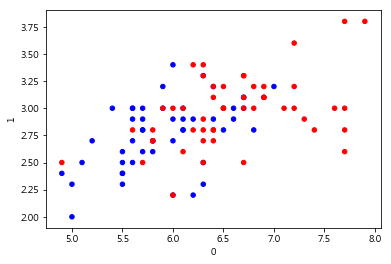

In [27]:
c = get_colormap(y, colors='rb')
data.plot(kind='scatter', x=0, y=1, c=c)

In [28]:
results = []
for n in range(10, 110, 10):
    model = Perceptron(n_iter=n, eta0=0.1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append((n, score))

In [29]:
report = DataFrame(results)
report.columns = ['n_iter', 'score']
report = report.set_index('n_iter')
report

,score
n_iter,
10,0.500000
20,0.900000
30,0.900000
40,0.900000
50,0.900000
60,0.966667
70,0.866667
80,0.833333
90,0.900000


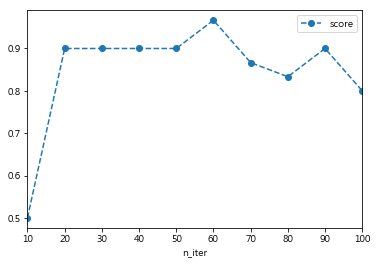

In [30]:
report.plot(style='o--')

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(C=1.0)

In [33]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
score = model.score(X_test, y_test)

In [35]:
score

0.90000000000000002

In [36]:
model.predict_proba(X_test)

array([[ 0.868717  ,  0.131283  ],
       [ 0.23520869,  0.76479131],
       [ 0.86647108,  0.13352892],
       [ 0.64847652,  0.35152348],
       [ 0.76935531,  0.23064469],
       [ 0.61093752,  0.38906248],
       [ 0.15764267,  0.84235733],
       [ 0.60319277,  0.39680723],
       [ 0.58142395,  0.41857605],
       [ 0.16938998,  0.83061002],
       [ 0.92108877,  0.07891123],
       [ 0.97735802,  0.02264198],
       [ 0.18245653,  0.81754347],
       [ 0.22924899,  0.77075101],
       [ 0.26183063,  0.73816937],
       [ 0.35455356,  0.64544644],
       [ 0.5377951 ,  0.4622049 ],
       [ 0.14984632,  0.85015368],
       [ 0.88035214,  0.11964786],
       [ 0.58683102,  0.41316898],
       [ 0.92603113,  0.07396887],
       [ 0.51319878,  0.48680122],
       [ 0.31615502,  0.68384498],
       [ 0.12304472,  0.87695528],
       [ 0.19574909,  0.80425091],
       [ 0.1762941 ,  0.8237059 ],
       [ 0.79727239,  0.20272761],
       [ 0.98239074,  0.01760926],
       [ 0.7777131 ,

In [37]:
X = iris.loc[:, 0:3].values

In [38]:
y = iris[4].values

In [39]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [41]:
model = LogisticRegression(C=1.0)

In [42]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
score = model.score(X_test, y_test)

In [44]:
score

0.9555555555555556

In [45]:
model.coef_

array([[ 0.39381599,  1.32264277, -2.09234116, -0.98614778],
       [ 0.37191418, -1.41989784,  0.32931412, -0.79496312],
       [-1.59116851, -1.32598827,  2.35222281,  1.94454035]])

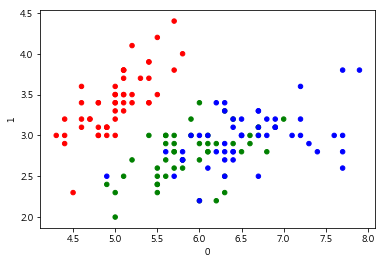

In [46]:
c = get_colormap(y, colors='rgb')
iris.plot(kind='scatter', x=0, y=1, c=c)

In [47]:
model.score(X_train, y_train)

0.98095238095238091

In [48]:
wine = pd.read_csv('data/wine.data')

In [49]:
wine.shape

(178, 14)

In [50]:
wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [51]:
y = wine['Class label'].values

In [52]:
X = wine.loc[:, 'Alcohol':].values

In [53]:
X.shape

(178, 13)

#### 연습

구성한 X, y에 대해 로지스틱 회귀(LR; Logistic Regression) 모델을 훈련하고, 평가합니다.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [55]:
model = LogisticRegression(C=1.0)

In [56]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
model.score(X_test, y_test)

0.98148148148148151

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [67]:
results = []
for C in [0.001, 0.01, 0.1, 1., 10., 100., 1000.]:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    results.append((C, score_train, score_test))

In [68]:
report = DataFrame(results)
report.columns = ['C', 'train', 'test']
report = report.set_index('C')
report

,train,test
C,,
0.001,0.741935,0.722222
0.010,0.927419,0.851852
0.100,0.991935,0.888889
1.000,0.991935,0.925926
10.000,0.991935,0.907407
100.000,1.000000,0.907407
1000.000,1.000000,0.907407


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['San Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


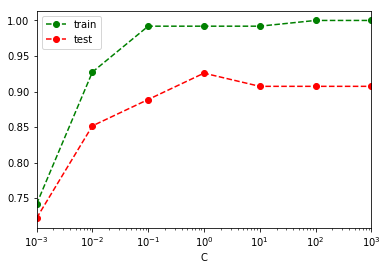

In [74]:
report.plot(logx=True, style=['go--', 'ro--'])

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [79]:
scaler = StandardScaler()

In [80]:
Xstd = scaler.fit_transform(X)

In [81]:
DataFrame(Xstd)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


#### 연습

스케일의 효과를 확인하기 위해, 스케일을 하지 않은 데이터와 스케일을 한 데이터에 대해 LR 모델에 대해 C의 값을 변화하면서 훈련하고 평가합니다.

In [82]:
X_tr, X_te, Xstd_tr, Xstd_te, y_tr, y_te = train_test_split(
    X, Xstd, y, test_size=0.3)

In [87]:
results = {'raw': [], 'std': []}
for C in [0.01, 0.1, 1., 10., 100., 1000.]:    
    model = LogisticRegression(C=C)
    model.fit(X_tr, y_tr)
    results['raw'].append((
        C, model.score(X_tr, y_tr), model.score(X_te, y_te)))    
    
    model.fit(Xstd_tr, y_tr)
    results['std'].append((
        C, model.score(Xstd_tr, y_tr), model.score(Xstd_te, y_te)))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['San Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


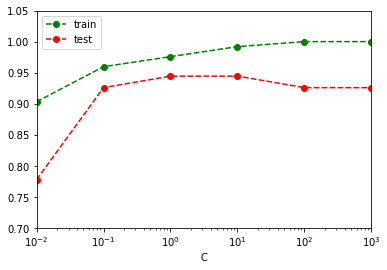

In [100]:
report_raw = DataFrame(results['raw'])
report_raw.columns = ['C', 'train', 'test']
report_raw = report_raw.set_index('C')
report_raw.plot(logx=True, style=['go--', 'ro--'], ylim=(0.7, 1.05))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['San Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


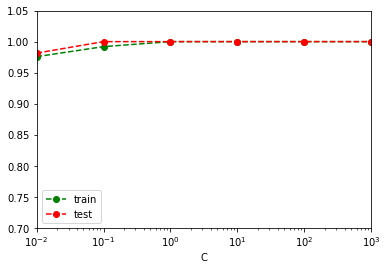

In [101]:
report_std = DataFrame(results['std'])
report_std.columns = ['C', 'train', 'test']
report_std = report_std.set_index('C')
report_std.plot(logx=True, style=['go--', 'ro--'], ylim=(0.7, 1.05))

In [103]:
from sklearn.decomposition import PCA

In [104]:
pca = PCA(n_components=2)

In [113]:
Xpca = pca.fit_transform(Xstd)

In [114]:
X.shape

(178, 13)

In [115]:
Xpca.shape

(178, 2)

In [116]:
X_tr, X_te, Xpca_tr, Xpca_te, y_tr, y_te = train_test_split(
    X, Xpca, y, test_size=0.3)

In [117]:
model = LogisticRegression(C=1.0)

In [118]:
model.fit(X_tr, y_tr).score(X_te, y_te)

0.92592592592592593

In [119]:
model.fit(Xpca_tr, y_tr).score(Xpca_te, y_te)

0.94444444444444442

In [120]:
pca = PCA(n_components=None)

In [121]:
pca.fit(Xstd)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [123]:
기여도 = pca.explained_variance_ratio_

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['San Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


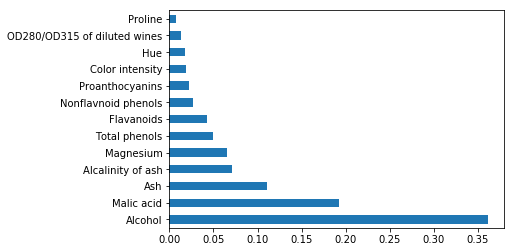

In [125]:
Series(기여도, index=wine.columns[1:]).plot(kind='barh')

TODO: PCA 결과 산포도 그래프

In [126]:
from sklearn.datasets import make_moons

In [127]:
X, y = make_moons(n_samples=100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['San Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


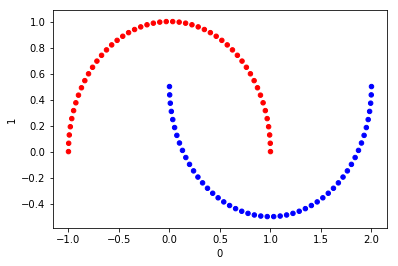

In [129]:
c = get_colormap(y, colors='rb')
DataFrame(X).plot(kind='scatter', x=0, y=1, c=c)

In [130]:
pca = PCA(n_components=2)

In [131]:
Xpca = pca.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['San Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


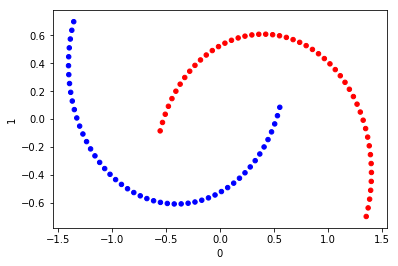

In [132]:
c = get_colormap(y, colors='rb')
DataFrame(Xpca).plot(kind='scatter', x=0, y=1, c=c)